The methodology adopted for the analysis is as follows.
![alt text](Doc2-1.png "Title")

In [391]:
import pandas as pd
import numpy as np 
import matplotlib as plt
import sys
# Input file path
Path_Fuel_Blend = 'C:/Users/yogeshbhandari20/Downloads/TechProject/BlendDefinitionTemplate_Stub.csv'
Path_Fuel_Price = 'C:/Users/yogeshbhandari20/Downloads/TechProject/PriceSimulationResult.csv'

Fuel_blend = pd.read_csv(Path_Fuel_Blend)
Price = pd.read_csv(Path_Fuel_Price)


The function(fuel()) is defined to collect the 'Percentage' and 'Blend components' corresponding to each 'BlendName'. 

In [392]:
def fuel():
    global Fuel_data
    
    """l1 list all the unique Blend Name.
    Based on l1 'Blend Component', and 'Percentage' are grouped in temp_1 and temp_2 """
    
    l1 = Fuel_blend["BlendName"].unique()
    l2 =[]
    
    for i in (l1):
        
        # Get all the information(Blend Name, Blend Component, Percentage) corresponding for each Blend Name.
        df = Fuel_blend.loc[Fuel_blend['BlendName'] == i, ['BlendName','BlendComponent','Percentage']]
        
        # Get percentage corresponding for each Blend Name and sum all the percenatges.
        temp = df['Percentage'].tolist()
        temp_1 = sum(df['Percentage'])
        
        # Get Blend Components for each Blend Name.
        temp_2 = df['BlendComponent'].tolist()
        
        # Append everything (Blend Name, Grouped Percentage, Aggeregated Percentage, Blend Component)in a list.     
        l2.append([i,temp,temp_1,temp_2])

    # Make the date frame from the list 'l2' 
    Fuel_data = pd.DataFrame(l2, columns = ['BlendName','Percentage','Agg_Percentage','Blend_Component'])
    



This function extracts the blend 'Percentage' & 'Blend_comp' for the given 'Blend Index'. It also extracts the column name having string 'Run'. The variables have global scope becuase they are used across many functions.    

In [393]:
def extract(df, Blend_Index) :
    
    # Declare global varibales as they have usability across the code 
    global Blend_comp
    global Percentage 
    global Run 
    Run = []
    
    # Get Blend Component(for e.g. [gas_HenryHub, gas_HSPC]]) and percentage(for e.g.[0.6, 0.4]) for i/p Blend_Index = 0
    Blend_comp = df['Blend_Component'][Blend_Index]
    Percentage = (df['Percentage'][Blend_Index])
    
    # List all the column name having string 'Run'  
    Run = [col for col in Price.columns if 'Run' in col]
    check(Fuel_data)
     

This function checks that aggregated percentage of all the components is equal to 1 and price simulation (Run_1,Run_2,Run_3..) should not consists of NaN values. If the the criteria is not met, then program is stopped. 

In [394]:
def check(Fuel_data):
    
    # Get the index location from Fuel_data for which aggregate percentage is not 1. 
    val = Fuel_data.index[Fuel_data['Agg_Percentage'][Blend_Index] !=1]
    index = [];index_1 = []
    
     # Loop to check the NaN for each Blend_comp. For e.g. [gas_HenryHub, gas_HSPC]]), loop will check NaN for 
    # gas_henryhub and later for gas_HSPC
    
    for i,Blend in enumerate(Blend_comp):
        for col in Run :
            #Loop runs for all columns having name 'Run' in Price
    
    # Filter 'Price' where Blend matches with rows in column'Name'. 
            df= Price[Price['Name'].str.contains(Blend)]
    # Identify the index location of NaN rows and append it in list Index. 
            temp = df.index[df[col].isnull()].tolist()
            index.append(temp)
                
    # Remove empty list form list of list[[],[],[],[1,2],[]]i.e. having Index_1 = [[1,2]]
    index_1 = [x for x in index if x != []]
         
    # Check if val or Index condition are not empty and issue hard stop. 
    if val !=0 or len(list(index_1)) !=0:
        
        # Issue print statement if aggregate percentage is not equal to 1.`
        if val!=0:
            print("Please check the Fuel Blend Percentage for ", Fuel_data['Blend_Component'][Blend_Index],
                  "as percentage is not 1",Fuel_data['Percentage'][Blend_Index] )
            
        # Issue print statement if 'Price' columns for any of  Blend_comp contains NaN values. 
        else:
            print("Please check the prices for Fuel Blend ",Fuel_data['Blend_Component'][Blend_Index],
                     "as price have NA at Index location", index_1)
            
        # Exit out of the function. 
        sys.exit(1)
    
    Fuel_Price()

This function would find the price from 'PriceSimulation.csv' corresponding to each Blend_comp based on 'Blend_Index' i/p and concatenate them in a list 'Blend_Price_2'. The 'Blend_Price_2'list would be consisting of the prices(Price corresponding to Run1,Run2, Run3, Run4, Run5) for each component. 

In [395]:
def Fuel_Price():
   
    Blend_Price_2 = []
    
    """"Blend and Percent consist of percentage and blend component. That is,loop should have Percent as '0.6' and Blend
        as 'gas_HenryHub' """
    
    for j, (Blend,Percent) in (enumerate(zip(Blend_comp, Percentage))):
        
        # Filter rows of 'Price' based on 'Blend'.    
        df = Price[Price['Name'].str.match(Blend)]
            
        ct = []; ct_1 = []
            
        for k in Run:
            
            # Multiply each 'Price' columns (Run1, Run2,..) with the respective percent. For example, 
            # 0.6 corresponding to 'gas_HenryHub' and 0.4 corresponding to 'gas_HSPC'   
            ct_2 = df[k].apply(lambda x: x*Percent)
            ct_1.append(ct_2)
        # Append all price simulations corresponding to each 'Blend_comp'.     
        Blend_Price_2.append(ct_1)
            
    total(Blend_Price_2)
    


        

The function (total()) calulates the total price for each Blend Component. The Blend_Price_2 should have price corresponding to each run for each component in the Blend_comp. 

In [396]:
def total(Blend_Price_2):
    FD = pd.DataFrame()
         
   #Blend_Price_2 has structure [Blend_comp(1)[Run1,Run2,Run3,Run4,Run5]
                               # Blend_comp(2)[Run1,Run2,Run3,Run4,Run4]]
   
    for l in range(len(Run)):
        ct_1 = []
        
        """The loop is reshaping the Blend_price structure. That is loop should extract Run1 for 'gas_HenryHub' and Run 1 for 
            gas_HSPC. Later, same should be true for Run2, Run3....so on""" 
   
        for m in range(len(Blend_Price_2)):
        # The m is iterating over each column of 'Blend_price' such that structure of ct could be 
        # [Run1(gas_Henryhub),Run1(gas_HSPC)]
            ct = Blend_Price_2[m][l]
            ct_1.append(ct)
        ct_2 = []
               
        # Zip should get element from each list of list. That is [[1,2,3],[4,5,6]] then n should have (1,4),(2,5) and (3,6)
        for n in zip(*ct_1):
            #print(n)
            ct_3 = (sum(n))
            ct_2.append(ct_3)
        ct_4 = pd.DataFrame(ct_2)
        
        # FD is data frame where each columns consist of total price for each 'Blend_Comp'. 
        FD = pd.concat([FD,ct_4],axis = 1)
   
    
        
    Analysis(FD)
    

    

The function (Analysis()) plots the fuel price data,gives insight for each column as per user input and writes data to excel file.

In [397]:
def Analysis(df):
         
    #Plot the data   
    ax = df.plot(kind='line', figsize=(15,10), grid=True, title='Fuel price simulation')
    ax.set(xlabel="Time_Series", ylabel="Fuel_Price")
    ax.legend(Run)
    
    #Describe over all price simulation data
    print(df.describe())
    
    print("Blend Composition", Fuel_data.iloc[Blend_Index]["Blend_Component"])
    print("Blend Percentage", Fuel_data.iloc[Blend_Index]["Percentage"])
    
    # Rename columns names as Run1, Run2, ....
    df.columns = Run
    
    """Add Date as the last column to data frame."""
    
    #Extract all the blend components for i/p 'Blend_Index'
    temp = Fuel_data['Blend_Component'][Blend_Index]
    
    #Filter 'Price' based on Blend_component name. temp should consist of list of blend_comp and temp[0] is first blend_comp in 
    # that list. 
    new_col = Price[Price['Name'].str.match(temp[0])]
    
    #Extract date column from the data frame
    temp_1 = new_col['Date']
    
    #Concatenate the data frame
    df = pd.concat([temp_1,df],axis =1)
    


   
    #Write data to excel file. 
    writer = pd.ExcelWriter('output.xlsx')
    df.to_excel(writer,'sheet_1')
    writer.save()

    

                 0            0            0            0            0
count  8760.000000  8760.000000  8760.000000  8760.000000  8760.000000
mean     31.568419    33.943676    31.252678    34.530226    35.058317
std      36.517866    38.088987    33.097563    44.327138    35.926501
min       7.397525     7.647850     5.845850     6.617450     9.329275
25%      19.117906    20.516881    18.740000    19.821156    21.565125
50%      23.816200    26.577663    23.953000    25.603437    27.360062
75%      30.985000    35.429612    32.044231    34.112519    36.234169
max     640.299875   806.876525   639.698450   813.587925   655.959550
Blend Composition ['ercot_Hub_North', 'ercot_Node_BarneyDavis']
Blend Percentage [0.25, 0.75]


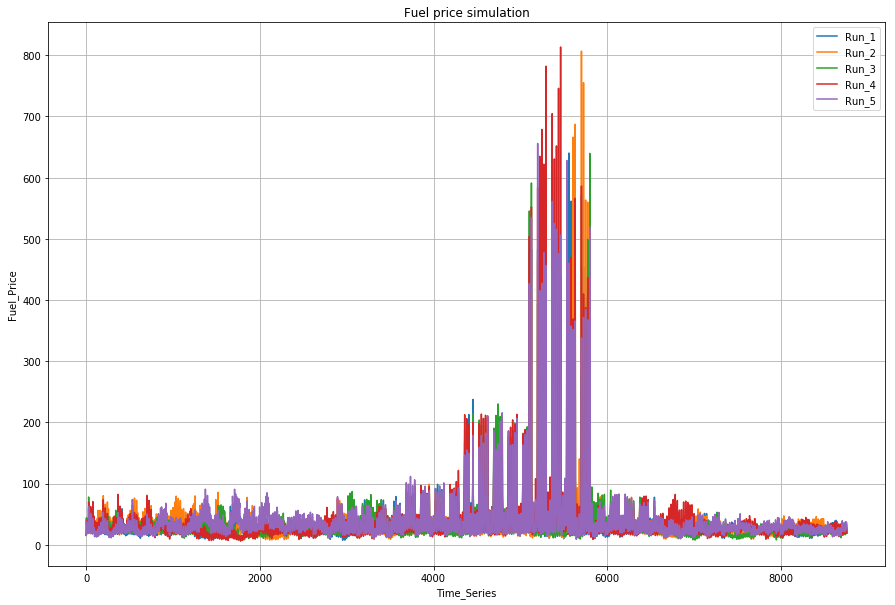

In [398]:
Blend_Index = 2
fuel()

extract(Fuel_data,Blend_Index)







